## HDS-M01-2024: Introduction to Machine Learning

**Module Leader & Lecturer:** Dr Abhirup Banerjee

**Practical tutors:** Thalia Seale, Mojtaba Lashgari, & Abhirup Banerjee

Adapted from practicals prepared by Prof Pier Palamara and Dr Sharib Ali

### Practical Set I (Data visualisation and Dimensionality Reduction)

#### What will you learn here?

    Exploratory data analysis using

- PCA: Principal Component Analysis - technique for dimensionality reduction via an orthogonal transformation (please also look into kPCA where a kernel trick is applied)

- t-SNE: t-Distributed Stochastic Neighbour Embedding - a machine learning technique for nonlinear dimensionality reduction, which embeds high-dimensional data for visualisation in a low-dimensional space

- SVD: singular value decomposition - a data reduction method by factorisation of a real matrix

- Biplots: explanatory graph, which allows information on both samples and features of a data matrix to be displayed graphically

Optional:
- MDS: multidimensional scaling - a technique that seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space

- Isomap: Isometric Mapping - one of the earliest approaches to manifold learning is the Isomap algorithm, short for Isometric Mapping. Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or kernel PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points

Let's first install all dependencies required for this module.

If you are using `conda`, run in your terminal
```
conda env create -f path_to/environment.yaml
conda activate intro_to_ml
```
and also remember to switch over your Jupyter notebook kernel!

You can also just install the missing packages manually.

In [3]:
import pandas as pd
import numpy as np
import time
from sklearn.impute import SimpleImputer

# ---> in case you miss any package simply install using ---> !pip install package-name


### Load the breast cancer Wisconsin (diagnostic) dataset
Details are available here https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [4]:
data = pd.read_csv('covid_19_sao_paulo_training.csv')
data.head()


,Unnamed: 0,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,1,001646dfe0e98df,6,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0026b35811a9267,15,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,00371001b52b72c,1,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00391dd8a9daef9,9,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,003ebccd5d5bfdd,18,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('total size of data before', data.shape)


total size of data before (5081, 111)


#### Data pre-processing

In [6]:
# drop unnecessary data column
data.drop(['Unnamed: 0', 'Patient ID'], axis=1, inplace=True)
# check the shape of your data
print('total size of data after', data.shape)


total size of data after (5081, 109)


In [7]:
# split data into features and labels (with all variables)
X = data
y = pd.read_csv('covid_19_sao_paulo_training_labels.csv')
y.head()
y.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# data normalisation
# Imputation of the train data
# imp = SimpleImputer(missing_values=-2, strategy='mean')
# X_norm = imp.fit_transform(X)
X_norm = X.replace({'not_detected':0, 
                    'detected':1, 
                    'negative': 0, 
                    'positive': 1, 
                    'not_done': np.nan, 
                    'absent': 0, 
                    'Ausentes': 0, 
                    'present': 1, 
                    'normal': 0, 
                    'clear':0,
                    'lightly_cloudy':1,
                    'cloudy': 2,
                    'altered_coloring': 0,
                    'Não Realizado':0,
                    '<1000': 500,
                    'Oxalato de Cálcio -++': 1,
                    'Urato Amorfo --+': 0,
                    'Oxalato de Cálcio +++':1,
                    'Urato Amorfo +++': 0,
                    'yellow': 1,
                    'citrus_yellow':0.75,
                    'light_yellow':0.5,
                    'orange': 2})

X_new = X_norm.copy()
for i in X_norm.columns:
  #  print(X_norm[i].isnull().mean())
    if X_norm[i].isnull().mean() >= 0.90:
        X_new.drop([i], axis=1, inplace=True)

print(X_new.shape)

(5081, 37)


  X_norm = X.replace({'not_detected':0,


In [23]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
Xlabels = X_new.columns.values
print(Xlabels)
X_new.head()
X_new1 = X_new.replace({'NA':nan})
X_new1.head()
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_new2 = pd.DataFrame(imputer.fit_transform(X_new1), columns = Xlabels)
X_new2.head()

['Patient age quantile' 'Patient addmited to regular ward (1=yes, 0=no)'
 'Patient addmited to semi-intensive unit (1=yes, 0=no)'
 'Patient addmited to intensive care unit (1=yes, 0=no)' 'Hematocrit'
 'Hemoglobin' 'Platelets' 'Mean platelet volume' 'Red blood Cells'
 'Lymphocytes' 'Mean corpuscular hemoglobin concentration\xa0(MCHC)'
 'Leukocytes' 'Basophils' 'Mean corpuscular hemoglobin (MCH)'
 'Eosinophils' 'Mean corpuscular volume (MCV)' 'Monocytes'
 'Red blood cell distribution width (RDW)' 'Respiratory Syncytial Virus'
 'Influenza A' 'Influenza B' 'Parainfluenza 1' 'CoronavirusNL63'
 'Rhinovirus/Enterovirus' 'Coronavirus HKU1' 'Parainfluenza 3'
 'Chlamydophila pneumoniae' 'Adenovirus' 'Parainfluenza 4'
 'Coronavirus229E' 'CoronavirusOC43' 'Inf A H1N1 2009'
 'Bordetella pertussis' 'Metapneumovirus' 'Parainfluenza 2'
 'Influenza B, rapid test' 'Influenza A, rapid test']


,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,6.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# encode y
y_en = y.replace({'negative': 0, 'positive': 1})
y_en = np.array(y_en)

# or use label binarise
#from sklearn.preprocessing import label_binarize
# Binarise the output
#y_en = label_binarize(y, classes=[0, 1])


/var/folders/cx/lwqfbpt10j77s8d_7tkp1kn80000gs/T/ipykernel_88982/3207641079.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_en = y.replace({'negative': 0, 'positive': 1})


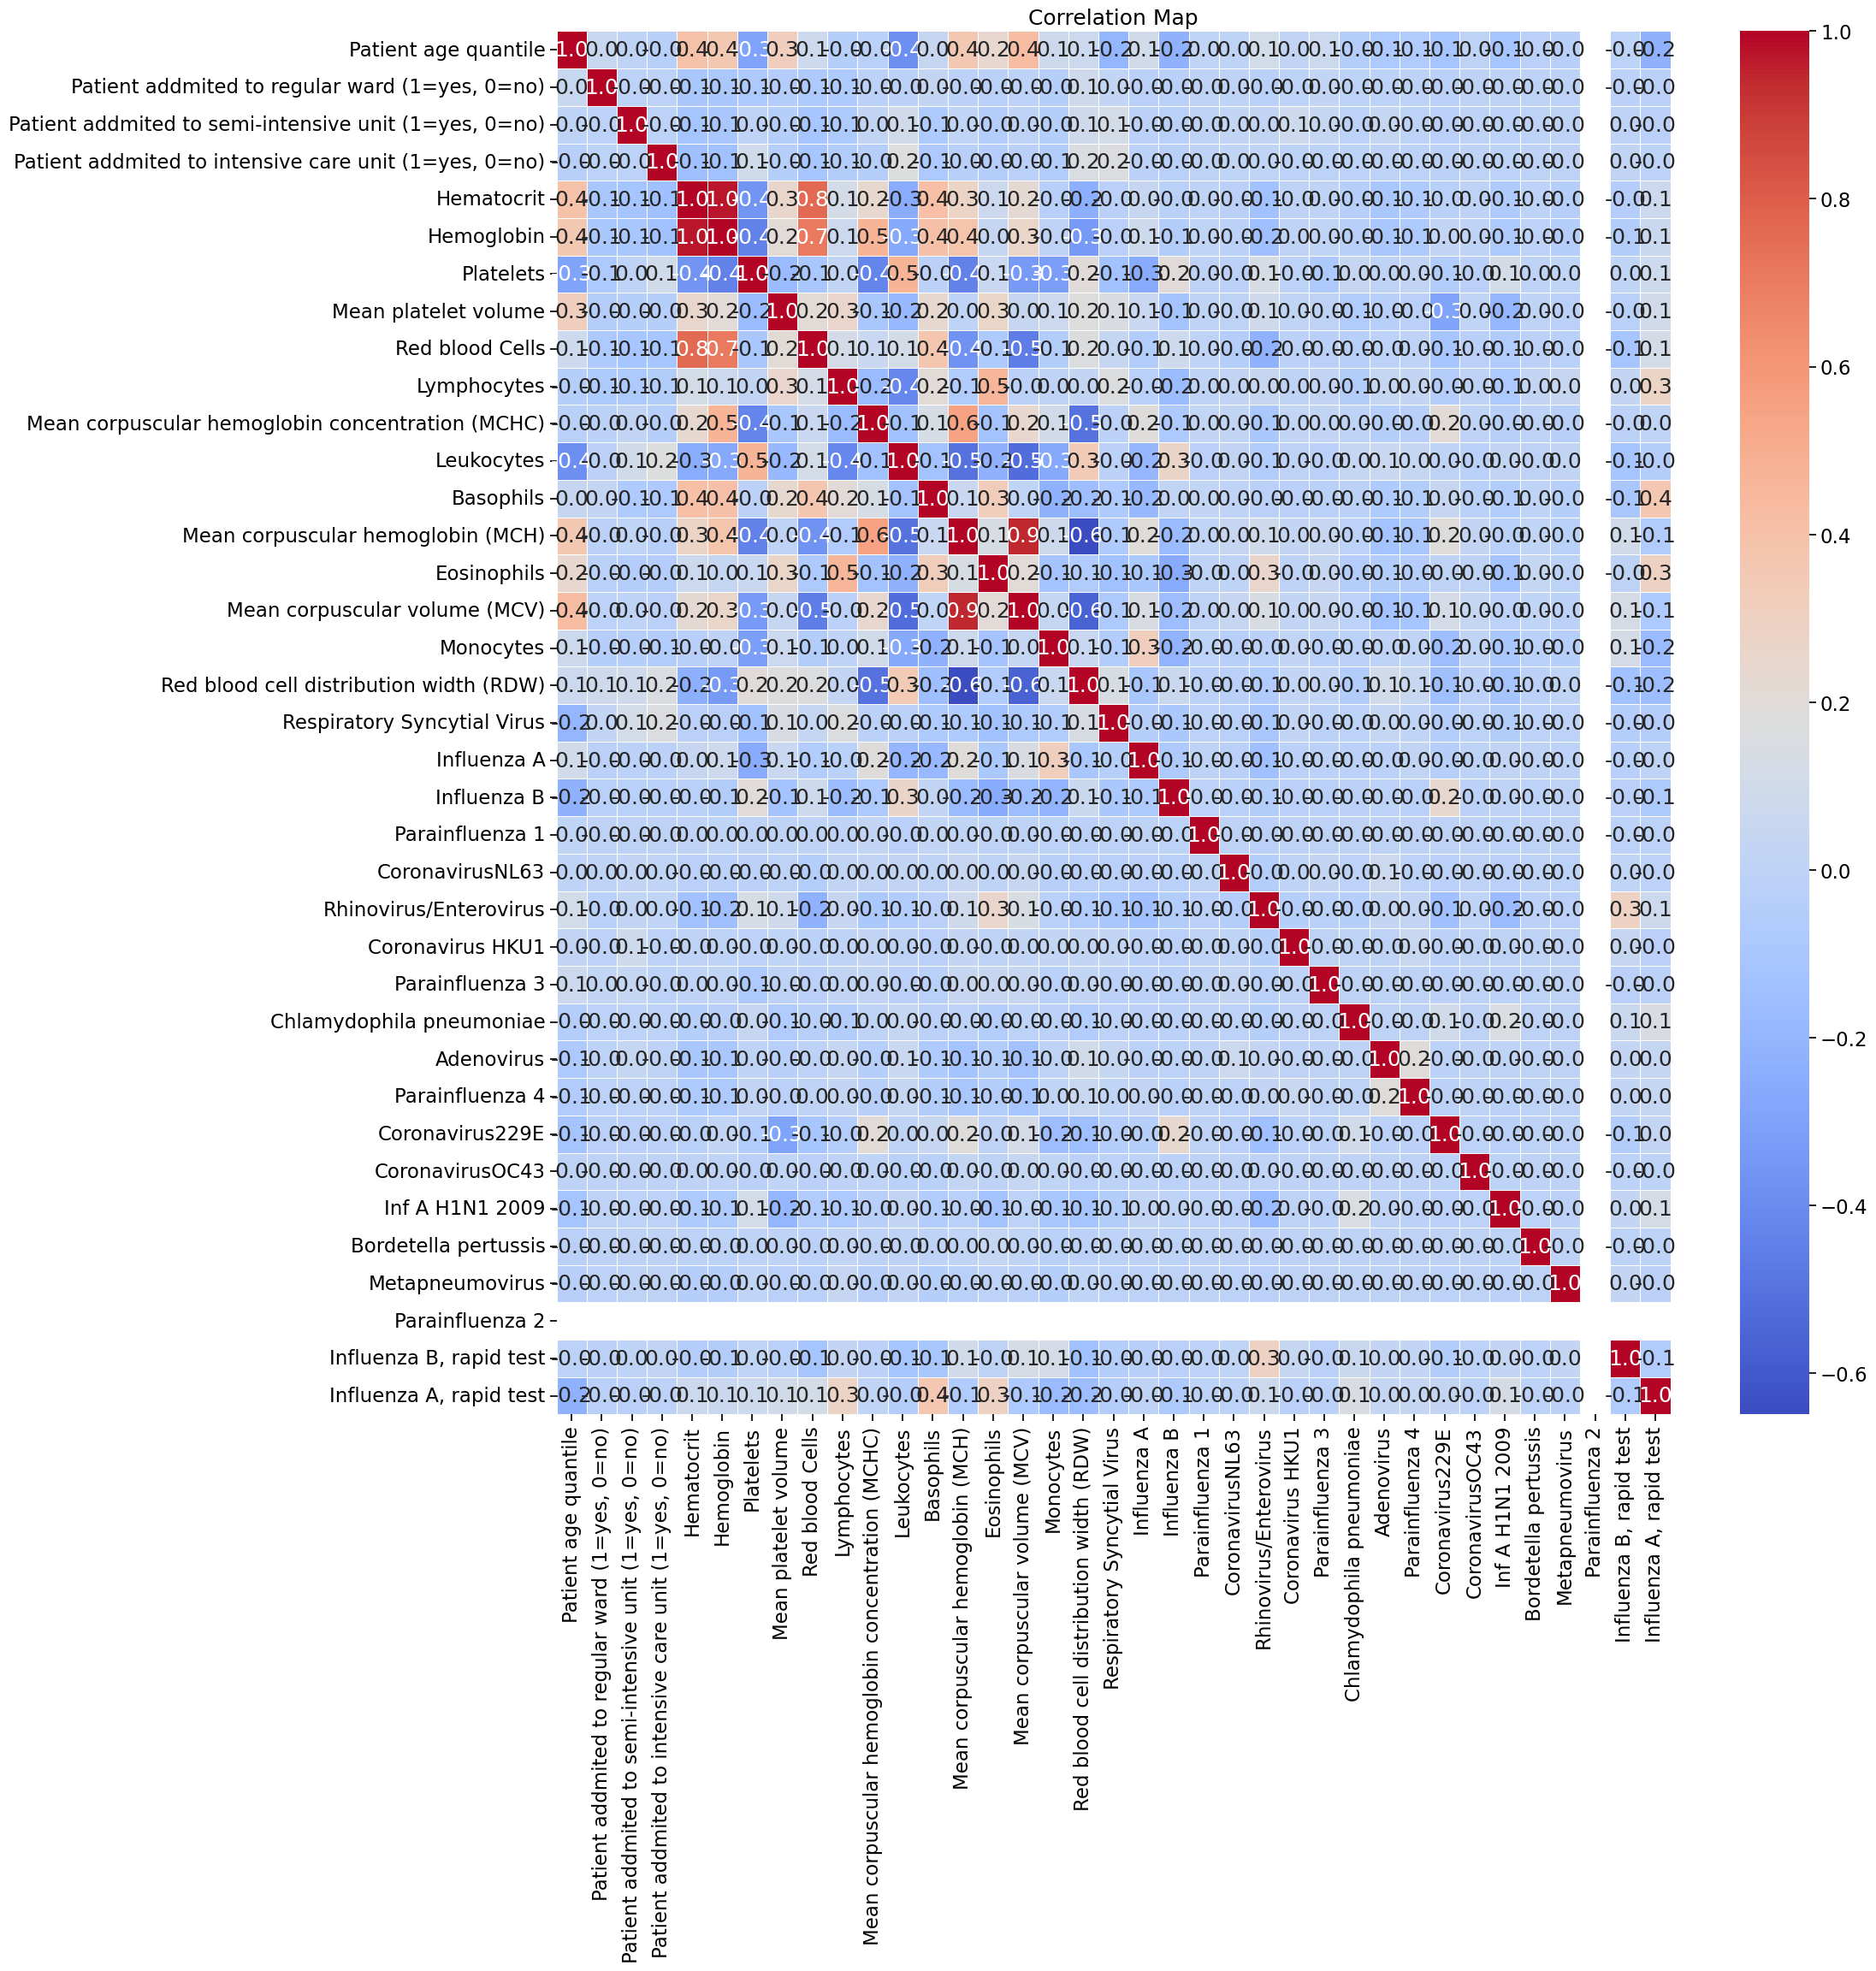

In [25]:
# plot correlation heat map

# visualise correlations by heatmap
f, ax = plt.subplots(figsize=(21, 21))
sns.heatmap(X_new2.corr(numeric_only=True), annot=True, linewidths=0.5,
            fmt='.1f', ax=ax, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()




In [27]:
# drop correlated and missing data

X_new2.drop(['Hemoglobin', 'Mean corpuscular hemoglobin (MCH)', 'Parainfluenza 2'], axis=1, inplace=True)

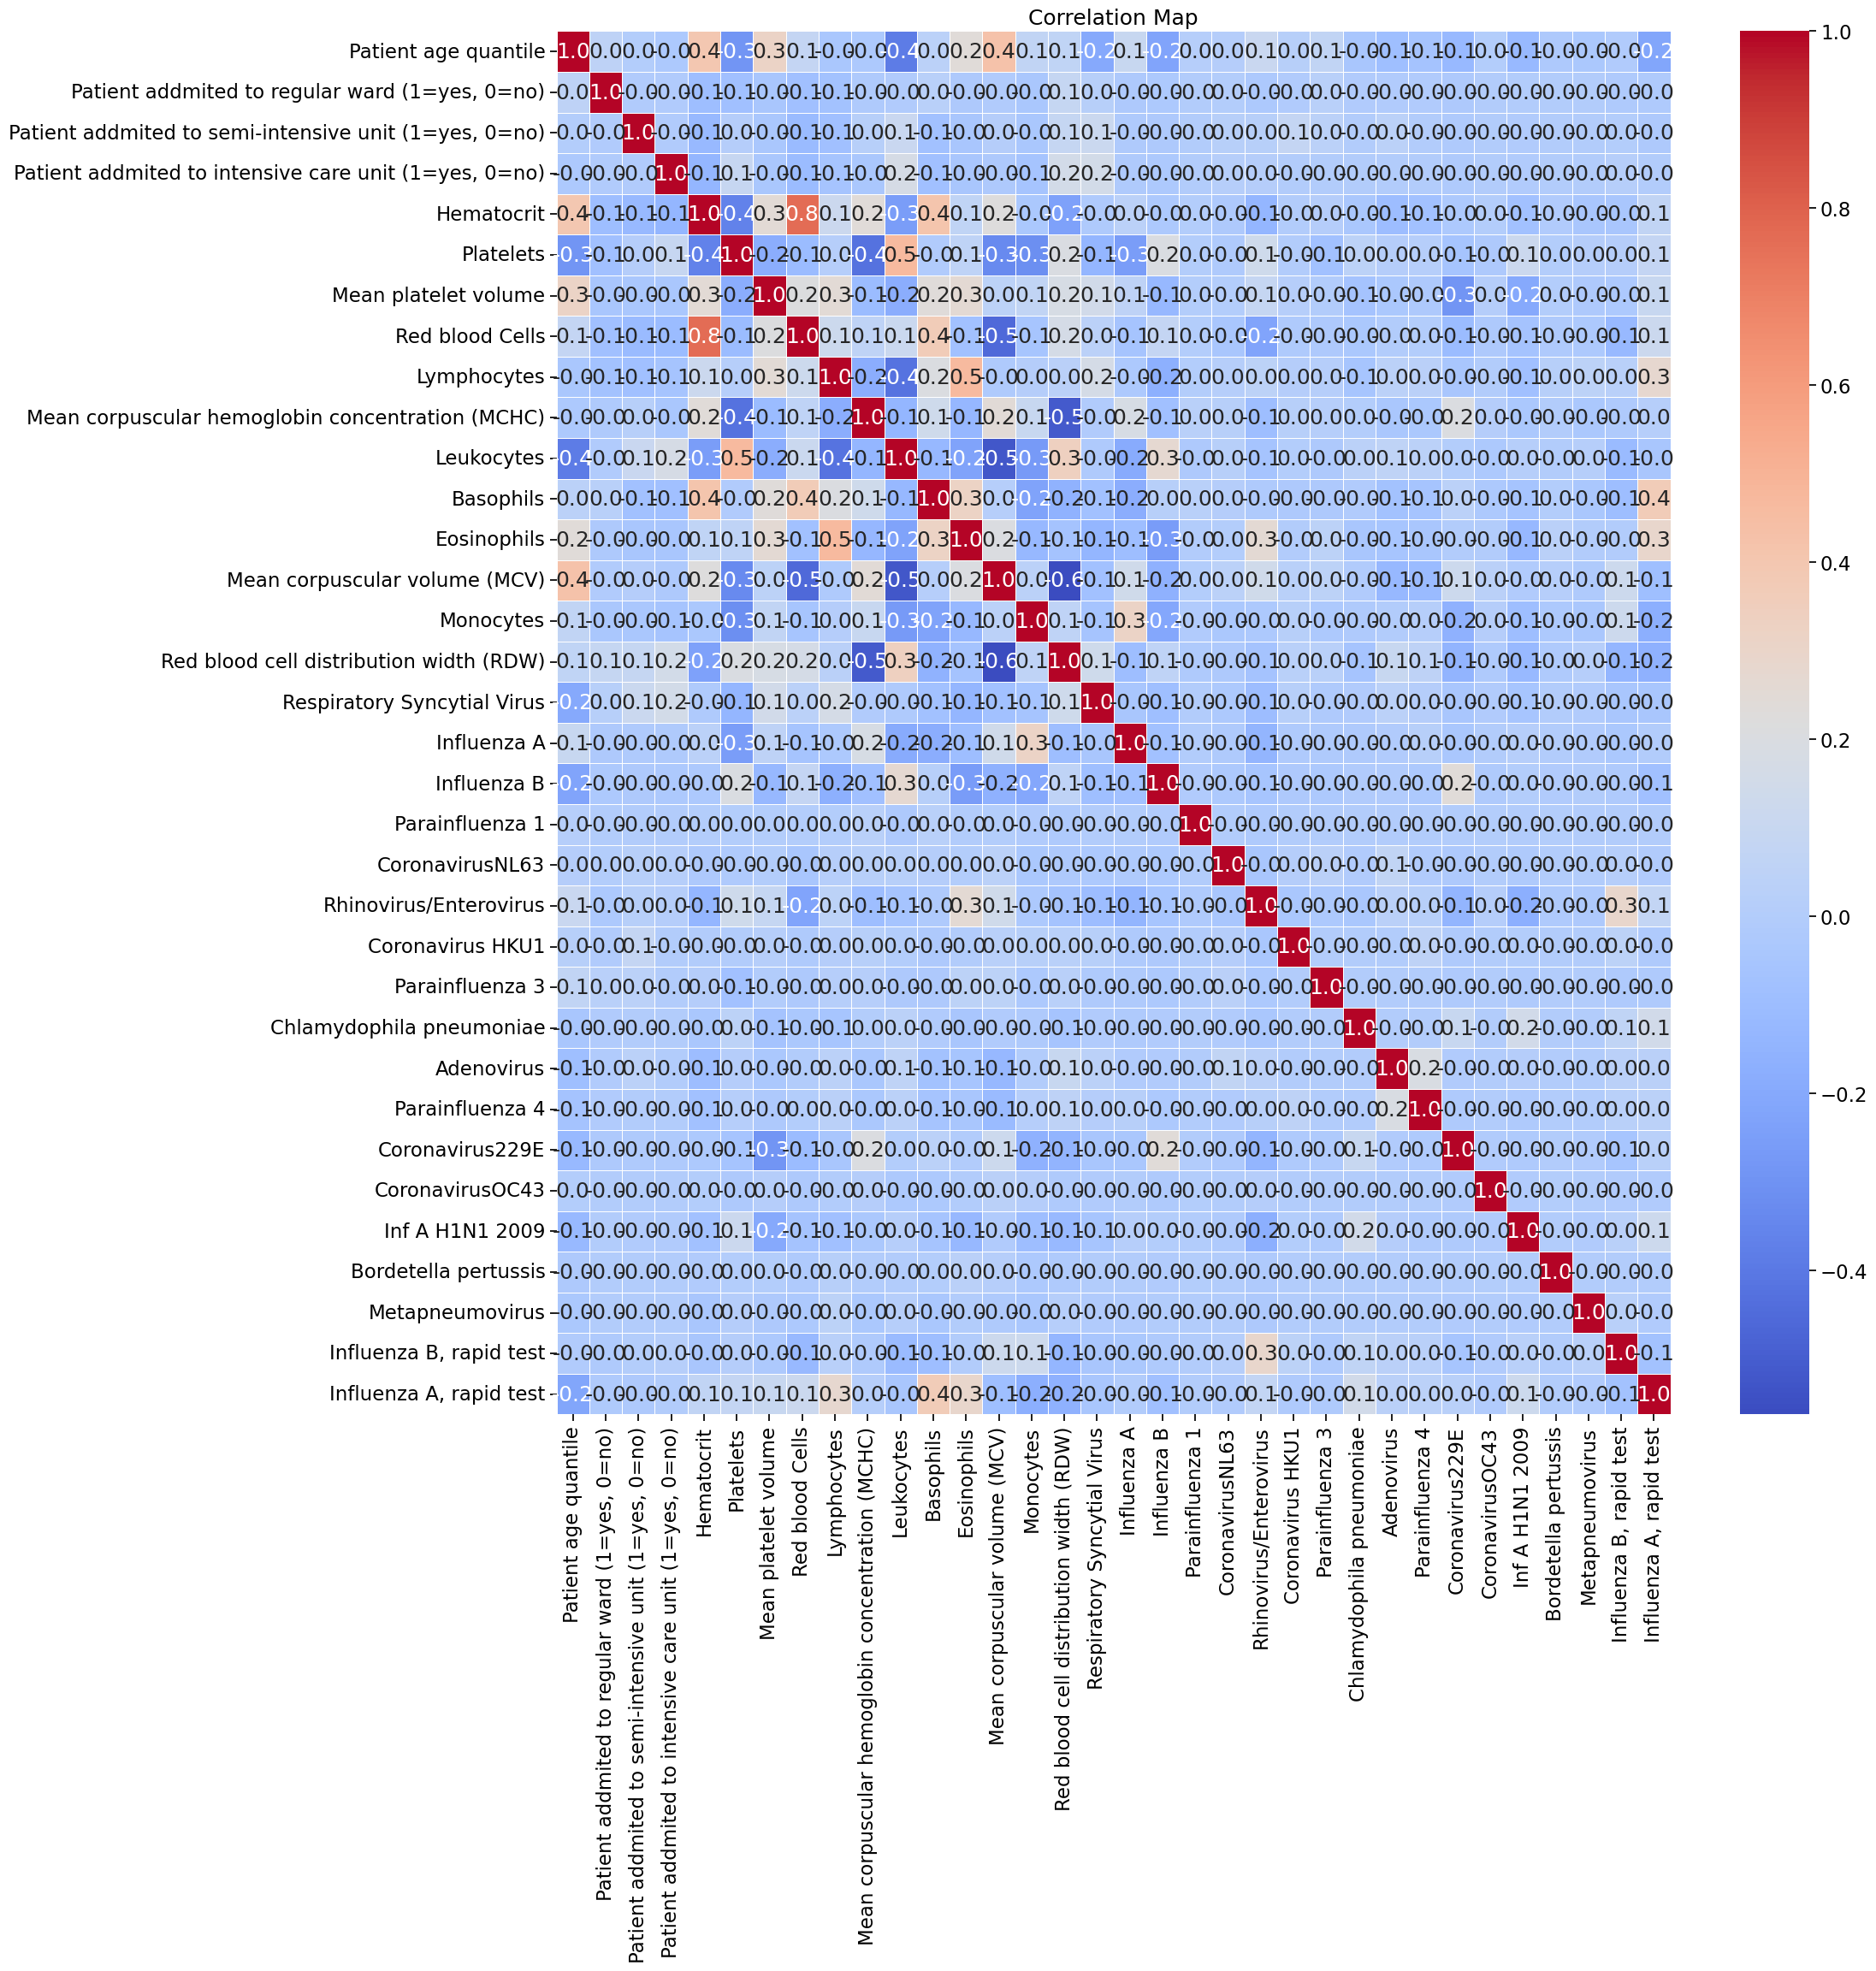

In [29]:
# visualise correlations by heatmap of cleaned dataset
f, ax = plt.subplots(figsize=(21, 21))
sns.heatmap(X_new2.corr(numeric_only=True), annot=True, linewidths=0.5,
            fmt='.1f', ax=ax, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()


#### Visualise the number of benign and malignant samples 


Number of positive :  503
Number of negative:  4578


/var/folders/cx/lwqfbpt10j77s8d_7tkp1kn80000gs/T/ipykernel_86319/863021797.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='x', data=y, palette='Set1')


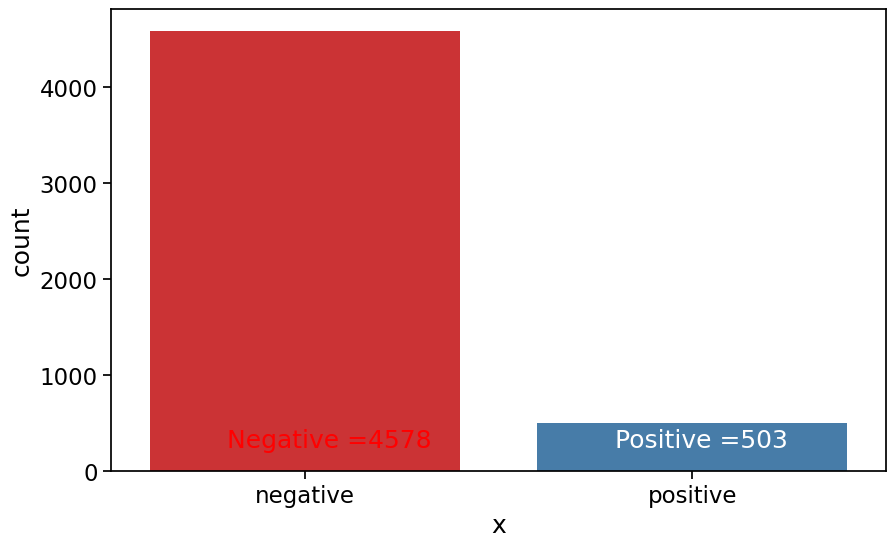

In [9]:
# plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns

# your code here  
negative, positive = y.value_counts()
print('Number of positive : ', positive)
print('Number of negative: ', negative)
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='x', data=y, palette='Set1')
plt.annotate('Negative ='+str(negative), xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Positive ='+str(positive), xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');


Double-click __here__ for the solution.
<!-- Your answer is below:
y = data.diagnosis   
B, M = y.value_counts()
print('Number of Malignant : ', M)
print('Number of Benign: ', B)
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='diagnosis', data=data, palette='Set1')
plt.annotate('Malignant ='+str(M), xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Benign ='+str(B), xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');
--->

### Dimension reduction using PCA, SVD and t-SNE

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
time_start = time.time()
n_components = 2  # number of coordinates
# your code here (store the components in X_reduced)
pca = PCA(n_components = n_components)
X_reduced = pca.fit_transform(X_norm)
print('PCA time: {} seconds'.format(time.time()-time_start))


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Double-click __here__ for the solution.
<!-- Your answer is below:
pca = PCA(n_components=n_components)
X_reduced=pca.fit_transform(X_norm)
print(X_reduced.shape)
-->

In [ ]:
# include KernelPCA as well


In [13]:
# 2D plotting PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
no_of_labels = 2


def plot_reduced_dims(X_reduced, y, no_of_labels, method):
    # you can write above function as just one statement instead of multiple if-elif
    # restructure the data
    df = pd.DataFrame(X_reduced)
    df['categories'] = np.reshape(y, [y.shape[0], 1])
    plt.figure(figsize=(12, 8))

    if method == 'PCA':
        df['pca-one'] = X_reduced[:, 0]
        df['pca-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='pca-one', y='pca-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    # code here for KPCA plots
    elif method == 'tsne':
        df['tsne-one'] = X_reduced[:, 0]
        df['tsne-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='tsne-one', y='tsne-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'svd':
        df['svd-one'] = X_reduced[:, 0]
        df['svd-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='svd-one', y='svd-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'mds':
        df['mds-one'] = X_reduced[:, 0]
        df['mds-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='mds-one', y='mds-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'isomap':
        df['isomap-one'] = X_reduced[:, 0]
        df['isomap-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='isomap-one', y='isomap-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)

    plt.legend(loc='upper right', ncol=6)  # horizontal legend upper right
    plt.show()


In [ ]:
plot_reduced_dims(X_reduced, y_en, 2, 'PCA')


In [ ]:
# code here for kernel PCA


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(X_norm)
svd_results = svd.transform(X_norm)
plot_reduced_dims(svd_results, y_en, 2, 'svd')
svd_results.shape


In [ ]:
# Task: use tSNE (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
# the perplexity is related to the number of nearest neighbours that is used in other manifold learning algorithms.
# Larger datasets usually require a larger perplexity.

# Your code here!


Double-click __here__ for the solution.
<!-- Your answer is below:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_norm)
print('t-SNE time: {} seconds'.format(time.time()-time_start))
-->

In [ ]:
plot_reduced_dims(tsne_results, y_en, 2, 'tsne')


### Biplots

### Biplots in PCA

Biplots show the data items (rows of **X**) in the space spanned by Principal Components (PCs). 

Biplots allow us to visualise the original variables $ X^{(1)}, \ldots, X^{(p)} $ (corresponding to columns of **X**) in the same plot.

---

#### Explanation

Recall that $ X = \left[ X^{(1)}, \ldots, X^{(p)} \right]^T $ and $ X = UDV^T $ is the SVD of the data matrix.

- The 'full' PC projection of $ x_i $ is the $ i $-th row of $ UD $:

$$
z_i = V^T x_i = D T U_i^T, \text{ equivalently: } X V = UD.
$$

- The $ j $-th unit vector $ e_j \in \mathbb{R}^p $ points in the direction of the original variable $ X^{(j)} $. Its PC projection $ \eta_j $ is:

$$
\eta_j = V^T e_j = V_j^T \quad \text{(the j-th row of V)}.
$$

- The projection of $ e_j $ indicates the weighting each PC gives to the original variable $ X^{(j)} $.

- Dot products between these projections give entries of the data matrix:

$$
x_{ij} = \sum_{k=1}^{\min(n,p)} U_{ik} D_{kk} V_{jk} = \langle D T U_i^T, V_j^T \rangle = \langle z_i, \eta_j \rangle.
$$

---

#### Summary

- Biplots focus on the first two PCs, and the quality depends on the proportion of variance explained by the first two PCs.


In [ ]:
# Biplots of PCA
class_labels = 2


def biplot_PCA(X_norm, y_en, class_labels=2, n_components=2):
    # restructure the data
    pca = PCA(n_components)
    PCA_results = pca.fit_transform(X_norm)
    df = pd.DataFrame(PCA_results)
    df['categories'] = np.reshape(y_en, [y_en.shape[0], 1])
    df['pca-one'] = PCA_results[:, 0]
    df['pca-two'] = PCA_results[:, 1]
    # scale the data
    scalex = 1.0/(PCA_results[:, 0].max() - PCA_results[:, 0].min())
    scaley = 1.0/(PCA_results[:, 1].max() - PCA_results[:, 1].min())
    # plot samples in 2D
    plt.figure(figsize=(12, 8))
    f = sns.scatterplot(
        x=PCA_results[:, 0]*scalex, y=PCA_results[:, 1]*scaley,
        hue='categories',
        palette=sns.color_palette('hls', no_of_labels),
        data=df.loc[:, :],
        legend='full',
        alpha=0.5)
    plt.legend(loc='upper right', ncol=6)  # horizontal legend upper right
    # plot arrows which represent the variables
    N = X_norm.shape[1]
    print(N)
    for i in range(N):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[
                  1, i], color='blue', alpha=0.5, width=0.004)

    plt.show()
    # print(pca.components_.shape)


In [ ]:
# call your biplot function
biplot_PCA(X_norm, y_en, class_labels, 2)


### Pre-processing: Correlation heatmap
This allows you to see features that are highly correlated. By looking at most correlated features and dropping them, you _might_ improve your training...

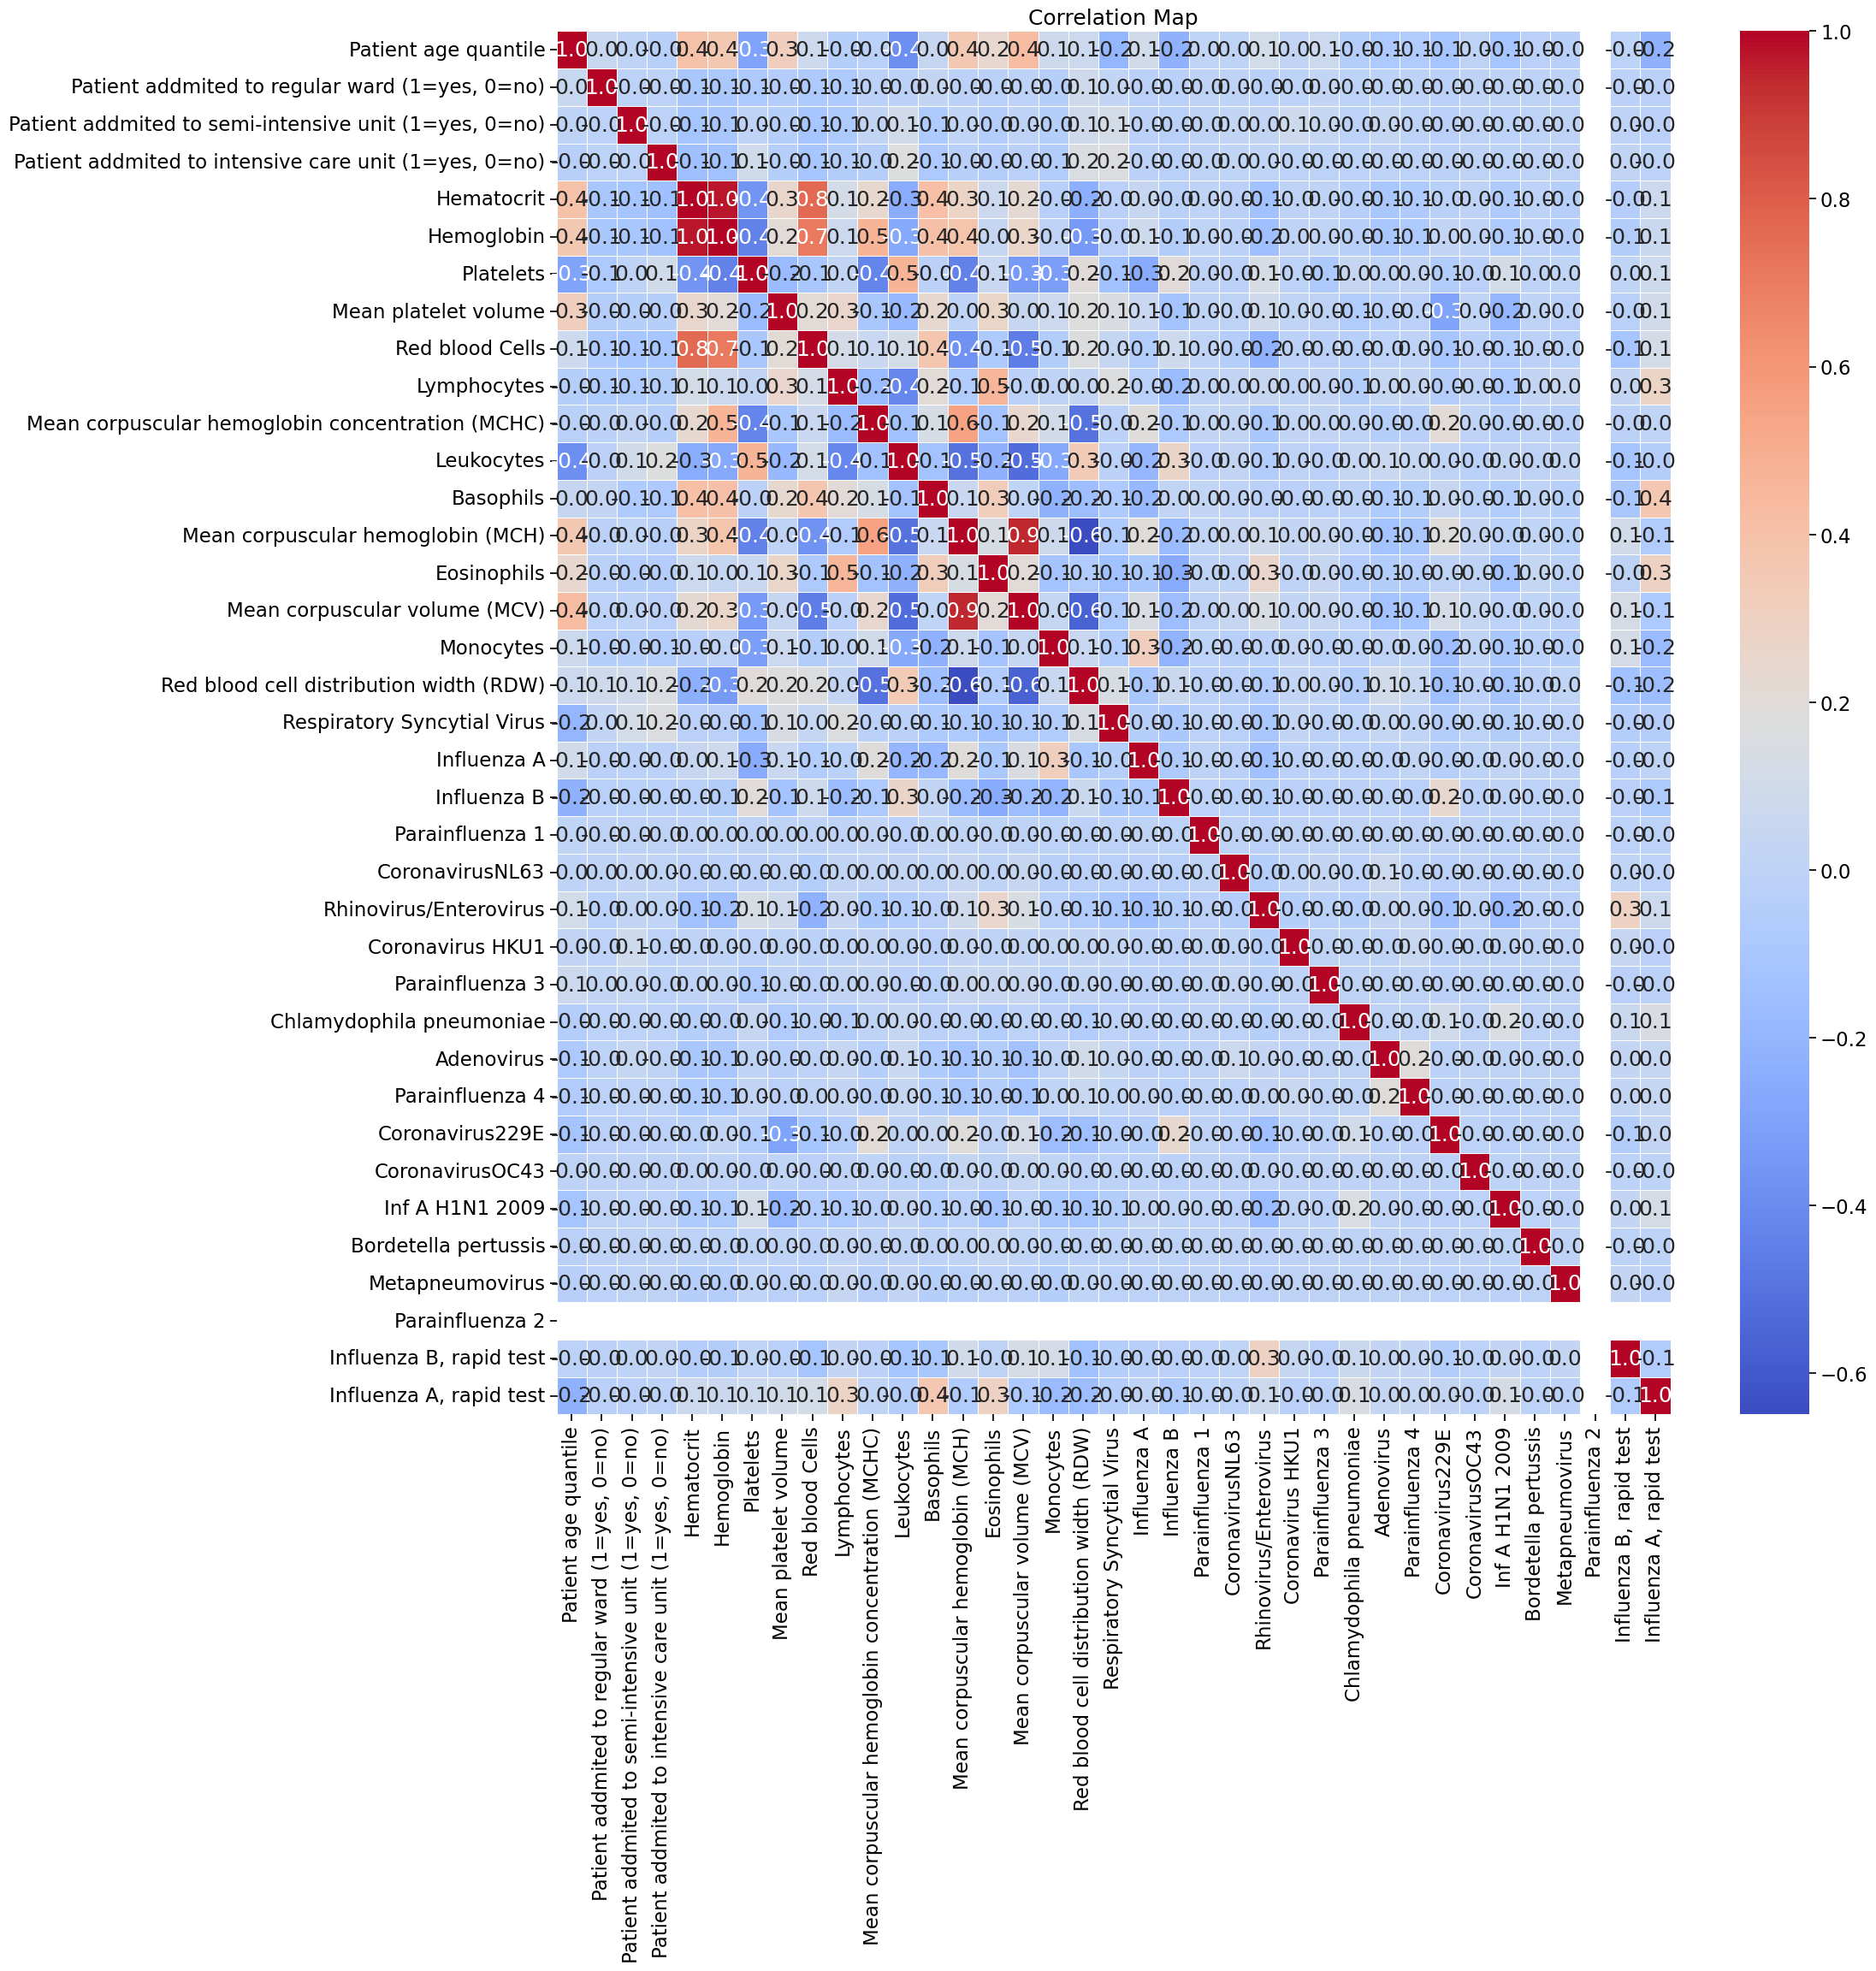

In [24]:
# visualise correlations by heatmap
f, ax = plt.subplots(figsize=(21, 21))
sns.heatmap(X_new2.corr(numeric_only=True), annot=True, linewidths=0.5,
            fmt='.1f', ax=ax, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

X_new2.drop(['Hemoglobin', 'Mean corpuscular hemoglobin (MCV)', 'Parainfluenza 2'], axis=1, inplace=True)


In [ ]:
# Based on the heatmap --> choose the best features for your learning methods
# Drop highly correlated so we can use one feature instead of all of them

# Your code here (hint: use data.drop)


In [ ]:
# make a biplot for the new feature vector now and observe the difference

# Your code here


### Multidimensional scaling 
MDS is a means of visualising the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals" into a configuration of n points mapped into an abstract Cartesian space.

In [ ]:
# your code here on MDS and call the 2D-plot above


### Isomap
Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension. 

In [ ]:
# Isomap
from sklearn.manifold import Isomap
time_start = time.time()
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(X_norm)
print('Isomap time: {} seconds'.format(time.time()-time_start))


In [ ]:
# call your biplot function
plot_reduced_dims(isomap_results, y_en, 2, 'isomap')


### Isomap in 3D?

In [ ]:
# Your code here


Double-click __here__ for the solution.
<!-- Your answer is below:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

isomap = Isomap(n_components=3)
isomap_results = isomap.fit_transform(X_norm)

%matplotlib inline
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(projection='3d')
n_neighbors=10
ax.scatter(isomap_results[:, 0], isomap_results[:, 1], isomap_results[:, 2], c=y_en, cmap=plt.cm.Spectral)
ax.view_init(45, 45)
-->

### EXERCISE: Use COVID-19 Sao Paulo challenge data 
Training data available on the Canvas page.

Perform all above steps in a separate Jupyter notebook. Observe the data, and see what can be done to normalise the data and reduce its dimension. This will be critical for your challenge participation later in the week.

<h3>Well done on completing this lesson!</h3>

Any comments or feedback, please send to [Thalia Seale](mailto:thalia.seale@eng.ox.ac.uk) and [Abhirup Banerjee]().
[MultiMeDIA Lab](https://eng.ox.ac.uk/multimedia)

# Split in to train and test

In [34]:

from sklearn.model_selection import train_test_split
import random
random.seed(1)


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_new2, y_en, test_size=0.25, random_state=0)




In [30]:
# Simple ensemble -- max voting (for e.g.)
# step 1: Lets choose three models (of course check best parameters for each model separately first)
from sklearn import svm
from sklearn import tree
from sklearn import linear_model
model1 = tree.DecisionTreeClassifier()
# Linear Kernel [linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable]
model2 = svm.SVC(kernel='rbf', gamma='scale', C=1000)
model3 = linear_model.LogisticRegression(penalty='l2', max_iter=3000)

In [35]:
# step 2: run

model1.fit(X_train1, y_train1)
print(
    f'Accuracy of model1 on training set: {model1.score(X_train1, y_train1):.2f}')
model2.fit(X_train1, y_train1)
print(
    f'Accuracy of model2 on training set: {model2.score(X_train1, y_train1):.2f}')
model3.fit(X_train1, y_train1)
print(
    f'Accuracy of model3 on training set: {model3.score(X_train1, y_train1):.2f}')

pred1 = model1.predict(X_test1)
print(
    f'Accuracy of model1 classifier on test set: {model1.score(X_test1, y_test1):.2f}')
pred2 = model2.predict(X_test1)
print(
    f'Accuracy of model2 classifier on test set: {model2.score(X_test1, y_test1):.2f}')
pred3 = model3.predict(X_test1)
print(
    f'Accuracy of model3 classifier on test set: {model3.score(X_test1, y_test1):.2f}')


Accuracy of model1 on training set: 0.92


/Users/joshgrier/Coding/Machine_Learning/Covid/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of model2 on training set: 0.92
Accuracy of model3 on training set: 0.91
Accuracy of model1 classifier on test set: 0.89


/Users/joshgrier/Coding/Machine_Learning/Covid/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of model2 classifier on test set: 0.88
Accuracy of model3 classifier on test set: 0.89


In [37]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(
    estimators=[('DT', model1), ('svm', model2), ('lr', model3)], voting='hard')
model.fit(X_train1, y_train1)
model.score(X_test1, y_test1)

/Users/joshgrier/Coding/Machine_Learning/Covid/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joshgrier/Coding/Machine_Learning/Covid/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.8929976396538158

test classification result for VotingClassifier:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1128
           1       0.77      0.07      0.13       143

    accuracy                           0.89      1271
   macro avg       0.83      0.53      0.54      1271
weighted avg       0.88      0.89      0.85      1271


test confusion matrix:
[[1125    3]
 [ 133   10]]


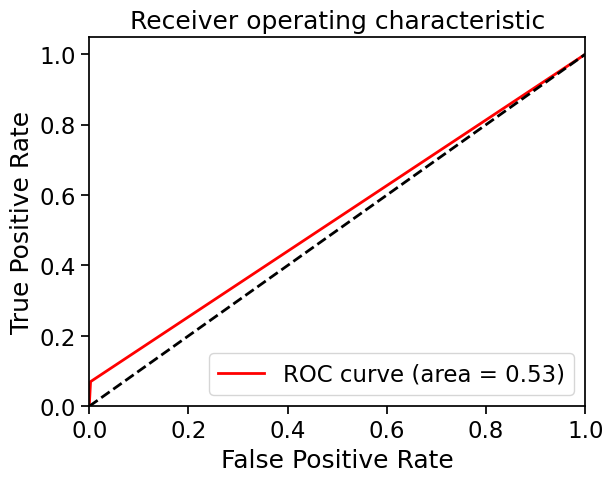

In [41]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area

predicted = model.predict(X_test1)
print('test classification result for %s:\n%s\n'
      % (model.__class__.__name__, metrics.classification_report(y_test1, predicted)))
print('test confusion matrix:\n%s' %
      metrics.confusion_matrix(y_test1, predicted))

y_test1 = y_test1.reshape(y_test1.shape[0], 1)
predicted = predicted.reshape(predicted.shape[0], 1)
fpr, tpr, thresholds = metrics.roc_curve(y_test1, predicted)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()